<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/5_Extracci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
%pip install openpyxl

In [2]:
#Carga desde un archivo .xlsx sin indice
Mexico= pd.read_csv("Mexico.csv", encoding="latin1")

In [3]:
#Verificamos información del DataFrame
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26401 entries, 0 to 26400
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  26401 non-null  object 
 1   source                                        26401 non-null  object 
 2   name                                          26401 non-null  object 
 3   description                                   25633 non-null  object 
 4   neighborhood_overview                         13970 non-null  object 
 5   host_id                                       26401 non-null  int64  
 6   host_name                                     25544 non-null  object 
 7   host_since                                    25487 non-null  object 
 8   host_location                                 20164 non-null  object 
 9   host_about                                    15164 non-null 

**Determinación de Clases para datos agrupados**


In [10]:
# Ajustar maximo de filas
pd.options.display.max_rows = None

In [4]:
#Corroboramos valores nulos
valores_nulos=Mexico.isnull().sum()
valores_nulos

last_scraped                                        0
source                                              0
name                                                0
description                                       768
neighborhood_overview                           12431
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                                3373
Length: 71, dtype: int64

In [5]:
#Calculamos el numero total de la población "n"
Mexico['price']. info()
n=26401

<class 'pandas.core.series.Series'>
RangeIndex: 26401 entries, 0 to 26400
Series name: price
Non-Null Count  Dtype 
--------------  ----- 
23127 non-null  object
dtypes: object(1)
memory usage: 206.4+ KB


In [7]:
Mexico['price'] = pd.to_numeric(
    Mexico['price'].astype(str).str.replace('$', ''),
    errors='coerce'
)

In [8]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=Mexico['price'].max()
Min=Mexico['price'].min()
Limites= [Min, Max]
Limites

[66.0, 999.0]

In [9]:
#Calculamos el rango R
R=Max-Min
R

933.0

In [10]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(26401)
ni

15.679779651994684

In [11]:
#Calculamos el Ancho del Intervalo "i"
i=R/ni
i

59.503387209992425

**Creación de Categorias a partir de clases**

In [12]:
#Categorización de variables
#Declaramos 8 intervalos 
#Ajustamos los limites para que todos los valores sean incluidos en los intervalos
#Ampliamos los límites en una unidad sobre los decimales menos significativos
#con la intención de incluir los valores que caigan justo en los límites
intervalos=np.linspace(65.9, 999.1, 16)
intervalos

array([ 65.9       , 128.11333333, 190.32666667, 252.54      ,
       314.75333333, 376.96666667, 439.18      , 501.39333333,
       563.60666667, 625.82      , 688.03333333, 750.24666667,
       812.46      , 874.67333333, 936.88666667, 999.1       ])

In [13]:
#Creamos las categorías 
categorias= ["Categoría1 (65.9-128 price)", "Categoría2 (129-190 price)","Categoría3 (191-252 price)", "Categoría4 (253-314 price)",
             "Categoría5 (315-376 price)", "Categoría6 (377-439 price)","Categoría7 (440-501 price)", "Categoría8 (502-563 price)", "Categoría9 (564-625 price)", "Categoría10 (626-688 price)","Categoría11 (689-750 price)", "Categoría12 (751-812 price)",
             "Categoría13 (813-875 price)", "Categoría14 (876-936 price)","Categoría15 (937-999.1 price)"
             ]

In [15]:
#Finalmente creamos las categorías en la columna numérica
Mexico['price']=pd.cut(x= Mexico['price'], bins=intervalos, labels= categorias)
Mexico['price']

0                                  NaN
1                                  NaN
2           Categoría9 (564-625 price)
3                                  NaN
4                                  NaN
                     ...              
26396                              NaN
26397    Categoría15 (937-999.1 price)
26398                              NaN
26399      Categoría10 (626-688 price)
26400                              NaN
Name: price, Length: 26401, dtype: category
Categories (15, object): ['Categoría1 (65.9-128 price)' < 'Categoría2 (129-190 price)' < 'Categoría3 (191-252 price)' < 'Categoría4 (253-314 price)' ... 'Categoría12 (751-812 price)' < 'Categoría13 (813-875 price)' < 'Categoría14 (876-936 price)' < 'Categoría15 (937-999.1 price)']

In [16]:
#Obtengo un análisis univariado de las variables categóricas
Tabla_freq = Mexico['price'].value_counts().reset_index()
Tabla_freq

price  count
0      Categoría7 (440-501 price)   1116
1      Categoría6 (377-439 price)   1017
2     Categoría12 (751-812 price)    958
3      Categoría9 (564-625 price)    918
4     Categoría13 (813-875 price)    905
5      Categoría8 (502-563 price)    904
6     Categoría10 (626-688 price)    896
7     Categoría11 (689-750 price)    889
8     Categoría14 (876-936 price)    874
9   Categoría15 (937-999.1 price)    846
10     Categoría5 (315-376 price)    770
11     Categoría4 (253-314 price)    532
12     Categoría3 (191-252 price)    343
13     Categoría2 (129-190 price)     96
14    Categoría1 (65.9-128 price)      7

In [17]:
#Obtengo un filtro de los valores más reelevantes de la variable categórica seleccionada
Filtro= Tabla_freq[Tabla_freq['count']>0]
Filtro

price  count
0      Categoría7 (440-501 price)   1116
1      Categoría6 (377-439 price)   1017
2     Categoría12 (751-812 price)    958
3      Categoría9 (564-625 price)    918
4     Categoría13 (813-875 price)    905
5      Categoría8 (502-563 price)    904
6     Categoría10 (626-688 price)    896
7     Categoría11 (689-750 price)    889
8     Categoría14 (876-936 price)    874
9   Categoría15 (937-999.1 price)    846
10     Categoría5 (315-376 price)    770
11     Categoría4 (253-314 price)    532
12     Categoría3 (191-252 price)    343
13     Categoría2 (129-190 price)     96
14    Categoría1 (65.9-128 price)      7

In [18]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('price')
Filtro_index

count
price                               
Categoría7 (440-501 price)      1116
Categoría6 (377-439 price)      1017
Categoría12 (751-812 price)      958
Categoría9 (564-625 price)       918
Categoría13 (813-875 price)      905
Categoría8 (502-563 price)       904
Categoría10 (626-688 price)      896
Categoría11 (689-750 price)      889
Categoría14 (876-936 price)      874
Categoría15 (937-999.1 price)    846
Categoría5 (315-376 price)       770
Categoría4 (253-314 price)       532
Categoría3 (191-252 price)       343
Categoría2 (129-190 price)        96
Categoría1 (65.9-128 price)        7

Text(0, 0.5, 'Frecuencia')

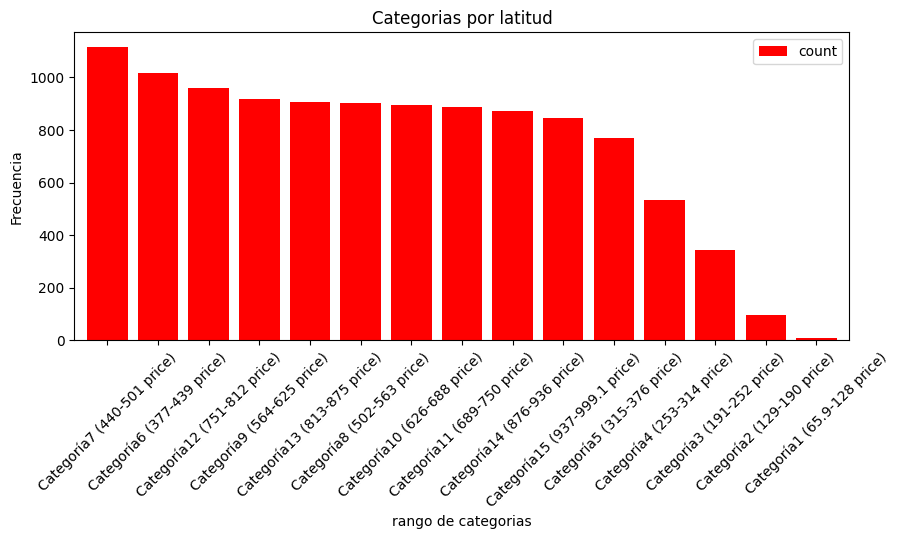

In [19]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red", rot=45)
plt.title('Categorias por latitud')
plt.xlabel('rango de categorias')
plt.ylabel('Frecuencia')